In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid") # plt.style.available # komutu ile tüm plot style lerini görüntüleyebiliriz.

import seaborn as sns

from collections import Counter

%matplotlib qt5

import warnings
warnings.filterwarnings("ignore")

# 1- Load and Check Data

In [2]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
test_PassengerId = test_df["PassengerId"] # ML derslerinde kullanacağız.

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2- Variable Description
1. PassengerId: unique id number to each passenger
1. Survived: passenger survive(1) or died(0)
1. Pclass: passenger class
1. Name: name
1. Sex: gender of passenger 
1. Age: age of passenger 
1. SibSp: number of siblings/spouses
1. Parch: number of parents/children 
1. Ticket: ticket number 
1. Fare: amount of money spent on ticket
1. Cabin: cabin category
1. Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Fare ve Age
* int64(5): Pclass, sibsp, parch, passengerId and survived
* object(5): Cabin, embarked, ticket, name and sex

# Univariate Variable Analysis
* Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
* Numerical Variable: Fare, age and passengerId

## A) Categorical Variable
2 ya da daha fazla kategoriden oluşan featurelardır.

In [7]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = train_df[variable]
    # count number of categorical variable(value/sample)
    varFreq = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varFreq.index, varFreq)
    plt.xticks(varFreq.index, varFreq.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varFreq))
    

 - Survived: 549=0, 342=0 => veriseti yarı yarıya değil. Yani bu veriseti dengeli bir veriseti değil diyebiliriz.
 - Sex: 549=0, 342=0 => veriseti yarı yarıya değil. Yani bu veriseti dengeli bir veriseti değil diyebiliriz. Ancak yeni bir veri geldi bu kişi erkek mi kadın mı diye sorulduğunda yüksek oranda erkektir diyebiliriz.

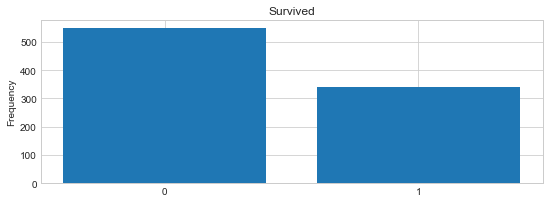

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


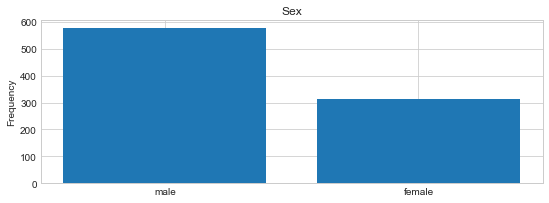

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


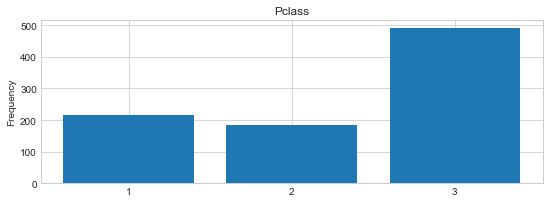

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


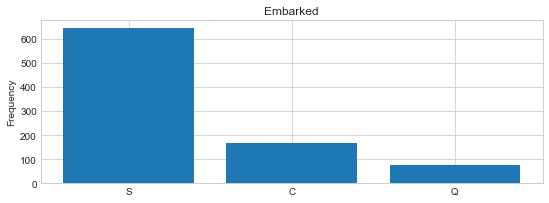

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


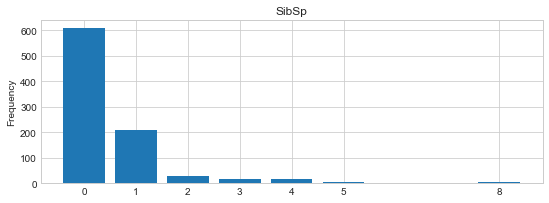

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


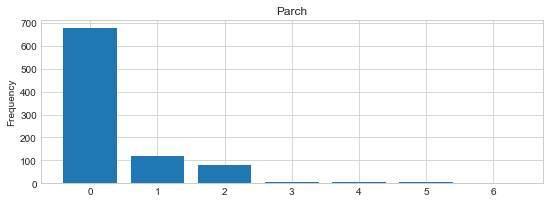

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [8]:
%matplotlib inline
category1 = ["Survived", "Sex","Pclass","Embarked","SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [9]:
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 



## B) Numerical Variable
Kategoriye ayrılmayan, yaş, fiyat, id gibi numeric ifadelerdir.

In [10]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

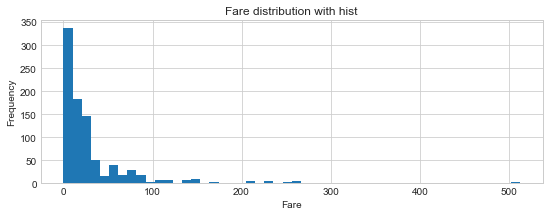

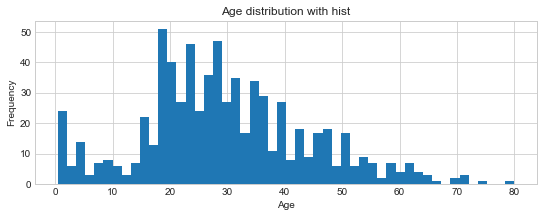

In [11]:
numericVar = ["Fare", "Age"]
for n in numericVar:
    plot_hist(n)

# 3- Basic Data Analysis

Bazı featureların birbirleriyle olan ilişkileri incelenecek. Bunlar:

* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [12]:
train_df[["Pclass","Survived"]].head() # istenilen columnları yazıdırma

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


- Pclass: 1 olan yolcuların Survived(hayatta kalma) olasılığı 0.62
- Pclass: 2 olan yolcuların Survived(hayatta kalma) olasılığı 0.47
- Pclass: 3 olan yolcuların Survived(hayatta kalma) olasılığı 0.24

Bu sonuçlara bakarak Pclass sınıfının Survived ile mantıksal olarak doğru orantılı bir ilişkisi vardır, diyebiliriz.

In [13]:
# Plcass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived", ascending = False) #as_index = False => indexleri print eder

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


- Yolcu kadın ise hayatta kalma olasılığı bir hayli yüksektir yorumu yapılabilir.

In [14]:
# Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
# Sibsp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# 4- Outlier Detection

Veriyi bozan, alakasız değerlerden (**outlier**) kurtulmamız gerekli.


In [17]:
array1 = np.array([1,2,3,4,5,100])
array1.mean()

19.166666666666668

Eğer **100** sayısı olmasaydı, onun yerine **6** sayısı olsaydı, ortalama bir hayli küçülecekti. **100** burada **outlier** bir değerdir, outlierdan kurtulmamız gerekir.

In [18]:
array1 = np.array([1,2,3,4,5,6])
array1.mean()

3.5

Tek bir outlierı çıkarmak doğru olmaz, 2 den fazla olmalı.

In [19]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:

        # 1st quartile
        Q1 = np.percentile(df[c],25)

        # 3rd quartile
        Q3 = np.percentile(df[c],75)

        # IQR
        IQR = Q3 - Q1

        # Outlier step
        outlier_step = IQR * 1.5

        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index

        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices) 
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [20]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])] #print outliers for age, sissp, parch and fare features

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [21]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

#  5- Missing Value
Train verilerinin yanında test verilerinin de missing value larına bakılması lazım. O yüzden şimdilik bu 2 veri birleştirilecektir. İkisi birlikte halledilecektir.
* Find Missing Value
* Fill Missing Value

In [22]:
train_df_len = len(train_df) # train'in uzunluğunu saklamak gerekir.
train_df = pd.concat([train_df, test_df],axis = 0).reset_index(drop = True)

In [23]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## A- Find Missing Value

In [24]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

- Şu anda **Age** feature unu doldurmuyoruz. Analiz etmemiz gerekiyor.
- **Cabin** bilgisi bizi ilgilendirmiyor.
- 
- Yalnızca **Embarked** ve **Fare** değerlerini dolduracağız.

In [26]:
train_df.isnull().sum() # Örneğin 256 adet yolcunun yaş değeri bilinmiyor.

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

## B- Fill Missing Value

**PClass** ya da **Fare**'leri eşit olduğu için bu sınıfa ait kişlerin **Embarked** değerleri ne ise onlarla doldurabiliriz.

* Embarked has 2 missing value
* Fare has only 1

In [27]:
train_df[train_df["Embarked"].isnull()] # print null values of Embarked feature.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


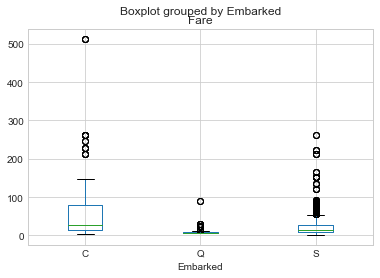

In [28]:
train_df.boxplot(column="Fare", by = "Embarked") #80 civarı olduğu için plotta, y eksenine denk gelen x ekseni olan C limanı ile doldururuz.
plt.show()

In [29]:
train_df["Embarked"] = train_df["Embarked"].fillna("C") # filled missing values
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [30]:
train_df[train_df["Fare"].isnull()] #Pclass ve Embarked ile yorumlanabilir

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [31]:
train_df[train_df["Pclass"] == 3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1293,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1296,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [32]:
train_df[train_df["Pclass"] == 3]["Fare"] # Sadece fare column'una bakmak için 

0        7.2500
2        7.9250
4        8.0500
5        8.4583
7       21.0750
         ...   
1293     7.7750
1294     8.0500
1296     7.2500
1297     8.0500
1298    22.3583
Name: Fare, Length: 702, dtype: float64

In [33]:
np.mean(train_df[train_df["Pclass"] == 3]["Fare"]) # 3.sınıftaki yolcular ortalama ne kadar ödemişler?

12.741219971469327

In [34]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"])) # 12.74 ortalama değerle doldururuz

In [35]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked



# SECTION - 2 - Visualization

## Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived
Bir yolcu hayatta kalmasında etkili olan featurelar hangileri?
Aşağıda bakıldığında **Fare** ile az da olsa doğru orantılı olarak görülmektedir(0.26). Diğer sütunlarla birlikte yeni sütun oluşturup yeni orantılar kurulabilir.

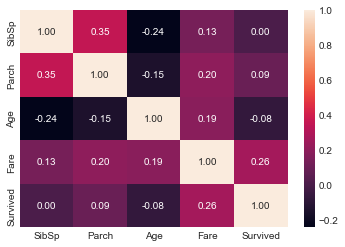

In [36]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f") # değerlerin görülmesini sağlar.
plt.show()

Fare feature seems to have correlation with survived feature (0.26).

## SibSp -- Survived

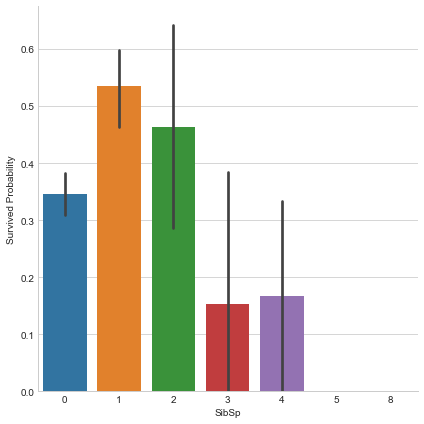

In [37]:
g = sns.factorplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

* Having a lot of SibSp have less chance to survive.
* if sibsp == 0 or 1 or 2, passenger has more chance to survive
* we can consider a new feature describing these categories.

## Parch -- Survived

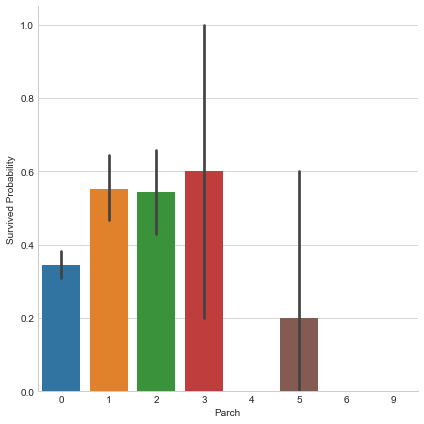

In [38]:
g = sns.factorplot(x = "Parch", y = "Survived", kind = "bar", data = train_df, size = 6)
g.set_ylabels("Survived Probability")
plt.show() # siyah çizgi standart sapma: örneğin : Parch=3 için survived oranı 0.2 de 1 de olabilir => ortalaması 0.6 çıkıyor.

* **Sibsp** and **parch** can be used for **new feature** extraction with **th = 3**
* **small** familes have more chance to survive.
* there is a **std** in survival of passenger with **parch = 3**

In [39]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1295,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1296,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Pclass -- Survived

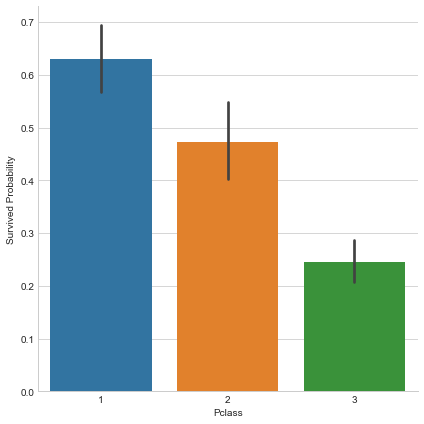

In [40]:
g = sns.factorplot(x = "Pclass", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show() # PClass ml için uygun bir sınıf. Surviveda doğrudan etkileyen verileri var

## Age -- Survived

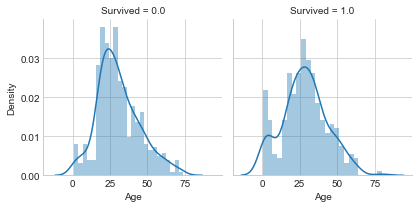

In [41]:
g = sns.FacetGrid(train_df, col = "Survived") 
g.map(sns.distplot, "Age", bins = 25) # ilkinde hayatta kalmayanlar, ikincisinde hayatta kalanların dağılımı
plt.show() # 2. plota bakıldığında çocukların kurtulma oranın yüksek olduğunu görüyoruz.

* age <= 10 has a high survival rate,
* oldest passengers (80) survived,
* large number of 20 years old did not survive,
* most passengers are in 15-35 age range,
* use age feature in training
* use age distribution for missing value of age

## Pclass -- Survived -- Age

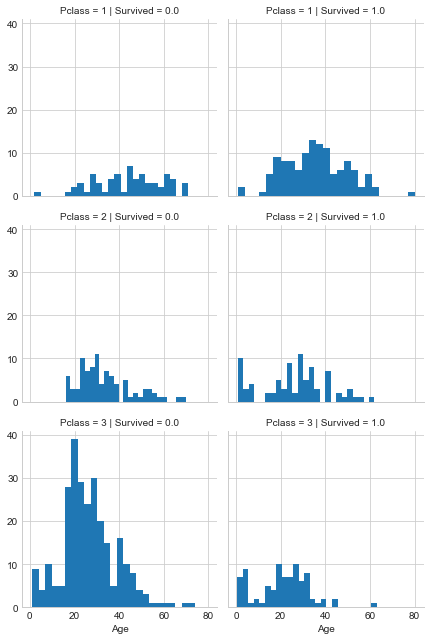

In [42]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass", size = 3)
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

* pclass is important feature for model training.

## Embarked -- Sex -- Pclass -- Survived

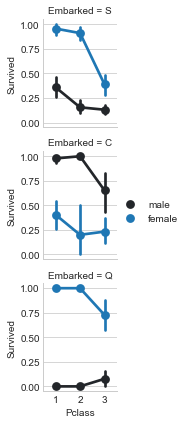

In [43]:
g = sns.FacetGrid(train_df, row = "Embarked", size = 2)
g.map(sns.pointplot, "Pclass","Survived","Sex")
g.add_legend()
plt.show()

* Female passengers have much better survival rate than males.
* males have better survşval rate in pclass 3 in C.
* embarked and sex will be used in training.

## Embarked -- Sex -- Fare -- Survived

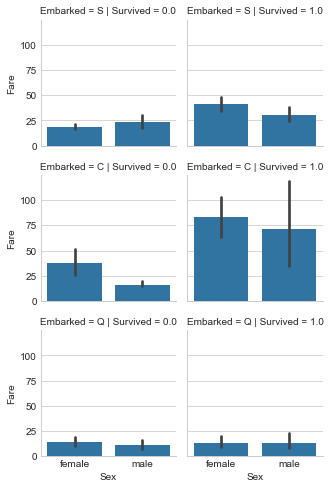

In [44]:
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived", size = 2.3)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

* Passsengers who pay higher fare have better survival. Fare can be used as categorical for training.

## Fill Missing: Age Feature

In [45]:
train_df[train_df["Age"].isnull()] # null olan Age sütunu verilerini getirir.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


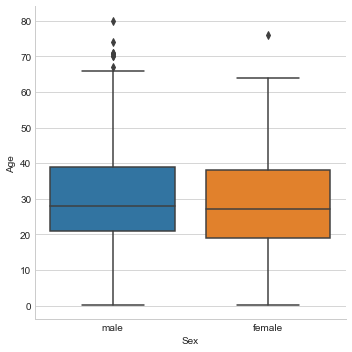

In [46]:
sns.factorplot(x = "Sex", y = "Age", data = train_df, kind = "box")
plt.show() #kadın ve erkeklerin median değerleri ortalama olarak aynı, bu yüzden age sütununa doğrudan etki etmez, bu feature'ı eleriz.

Sex is not informative for age prediction, age distribution seems to be same.

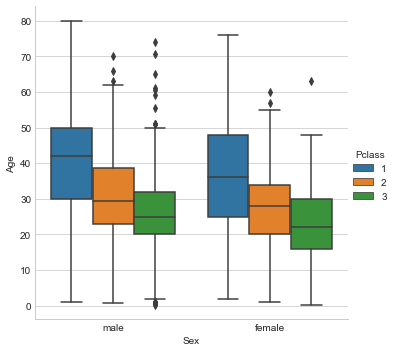

In [47]:
sns.factorplot(x = "Sex", y = "Age", hue = "Pclass",data = train_df, kind = "box")
plt.show()

1st class passengers are older than 2nd, and 2nd is older than 3rd class. 

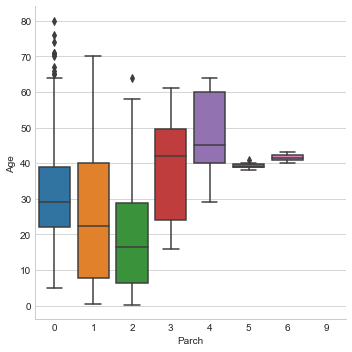

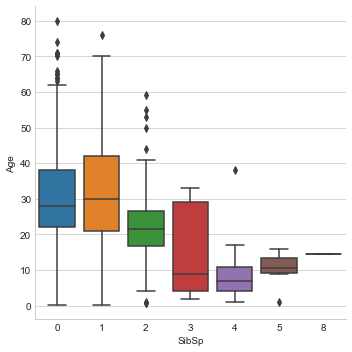

In [48]:
sns.factorplot(x = "Parch", y = "Age", data = train_df, kind = "box")
sns.factorplot(x = "SibSp", y = "Age", data = train_df, kind = "box")
plt.show()

In [49]:
#train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]] # convert object to int

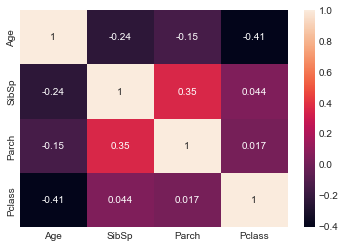

In [50]:
sns.heatmap(train_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

**Age** is not correlated with **sex** but it is correlated with **parch**, **sibsp** and **pclass**.

In [51]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index) # null değerlere sahip indexleri tutar.
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) & (train_df["Parch"] == train_df.iloc[i]["Parch"]) & (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median() # geriye bazı null değerleri kalmıştı. Onları eski usülle doldurulacak.
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [52]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# 6) Introduction to ML & Feature Engineering

## A) Name and Title

In [53]:
train_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

- İsimlerin bir önemi yok ancak, ünvanların bir önemi olabilir. örneğin Mr. ya da Mrs

In [54]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name] # -1 = last element
train_df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

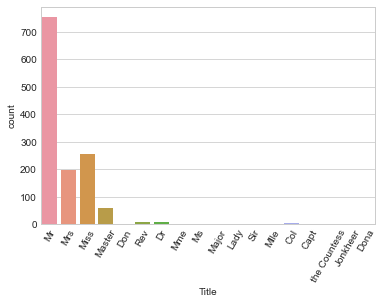

In [55]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60) # x eksenindeki yazılar 60 derece ile gösterilir.
plt.show()

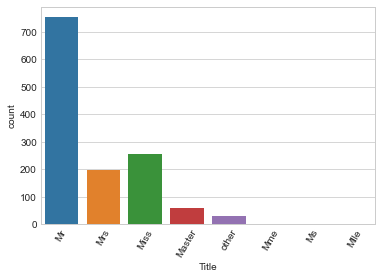

In [56]:
# convert to categorical
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")

sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60) # x eksenindeki yazılar 60 derece ile gösterilir.
plt.show()

In [57]:
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]

train_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

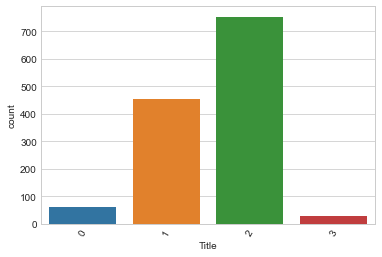

In [58]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60) # x eksenindeki yazılar 60 derece ile gösterilir.
plt.show()

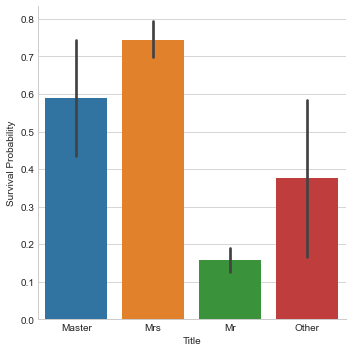

In [59]:
g = sns.factorplot(x = "Title", y = "Survived", data = train_df, kind = "bar")
g.set_xticklabels(["Master", "Mrs", "Mr", "Other"])
g.set_ylabels("Survival Probability")
plt.show()

### Note
Title sütununu ekledik. Artık name feature'unu kaldırabiliriz.

In [60]:
train_df.drop(labels = ["Name"], axis = 1, inplace = True)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


### Convert to Numeric Values to Categorical Values for Title Column
- Title=0 ise title_0 = 1 olarak (diğerleri 0) convert eder.
- Title=1 ise title_1 = 1 olarak (diğerleri 0) convert eder.
- Title=2 ise title_2 = 1 olarak (diğerleri 0) convert eder.
- Title=3 ise title_3 = 1 olarak (diğerleri 0) convert eder.

In [61]:
train_df = pd.get_dummies(train_df, columns=["Title"]) # title_0, title_1..
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


## B) Family Size

Parch ve SibSp yi birleştirip yeni Fsize adında feature elde edeceğiz.

In [62]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1 # yolcunun kendisi de olacağı için
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


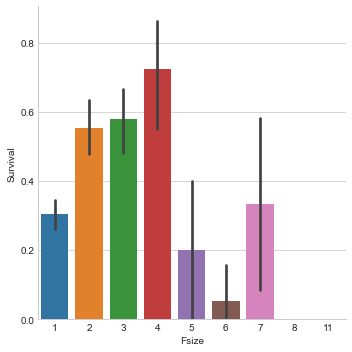

In [63]:
g = sns.factorplot(x = "Fsize", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

### NOTE
Plota göre family size 5'ten itibaren survived oranı düşüyor.

In [64]:
# family size < 5  => family_size = 1
# family size >= 5 => family_size = 0
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]

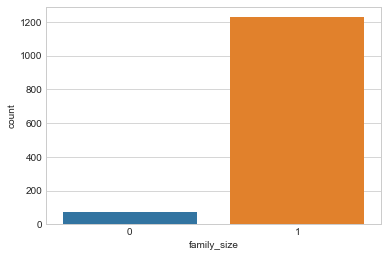

In [65]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

### Note
Grafiğe göre büyük aileler (5 ve 5 ten büyük) kurtulma şansı düşükken,
az bireyli(5ten küçük) ailelerin kurtulma oranı yüksektir.

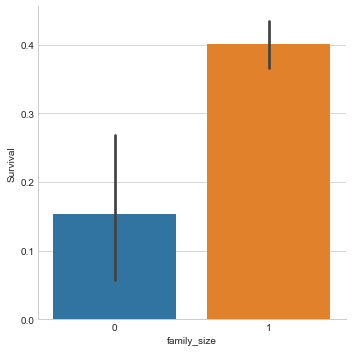

In [66]:
g = sns.factorplot(x = "family_size", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show() 

In [67]:
train_df.drop(labels = ["Parch", "SibSp", "Fsize"], axis = 1, inplace = True)

In [68]:
train_df = pd.get_dummies(train_df, columns= ["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,family_size_0,family_size_1
0,1,0.0,3,male,22.0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,1
1,2,1.0,1,female,38.0,PC 17599,71.2833,C85,C,0,1,0,0,0,1
2,3,1.0,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,1
3,4,1.0,1,female,35.0,113803,53.1000,C123,S,0,1,0,0,0,1
4,5,0.0,3,male,35.0,373450,8.0500,NaN,S,0,0,1,0,0,1


## C) Embarked Feature
Bu featureu olduğu gibi kullanırız, feature extraction işlemine gerek yok.

In [69]:
train_df["Embarked"].head() # Yolcular hangi limandan bindi.

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

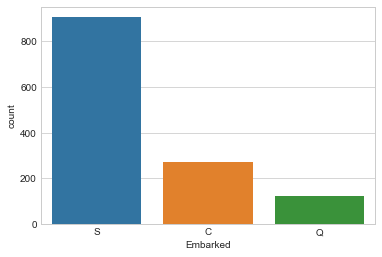

In [70]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

In [71]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,A/5 21171,7.2500,NaN,0,0,1,0,0,1,0,0,1
1,2,1.0,1,female,38.0,PC 17599,71.2833,C85,0,1,0,0,0,1,1,0,0
2,3,1.0,3,female,26.0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,1,0,0,1
3,4,1.0,1,female,35.0,113803,53.1000,C123,0,1,0,0,0,1,0,0,1
4,5,0.0,3,male,35.0,373450,8.0500,NaN,0,0,1,0,0,1,0,0,1


## D) Ticket

In [72]:
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [73]:
a = "A/5. 2151" # Örnek
a.replace(".","").replace("/","").strip().split(" ")[0]

'A5'

In [74]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x") # eğer başında bir şey yoksa x yazdırılır.
train_df["Ticket"] = tickets
train_df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [75]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,A5,7.2500,NaN,0,0,1,0,0,1,0,0,1
1,2,1.0,1,female,38.0,PC,71.2833,C85,0,1,0,0,0,1,1,0,0
2,3,1.0,3,female,26.0,STONO2,7.9250,NaN,0,1,0,0,0,1,0,0,1
3,4,1.0,1,female,35.0,x,53.1000,C123,0,1,0,0,0,1,0,0,1
4,5,0.0,3,male,35.0,x,8.0500,NaN,0,0,1,0,0,1,0,0,1


In [76]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix = "T") #Ticket_ yerine T_ kullanılması için prefix belirtiriz.
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Title_0,Title_1,Title_2,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,male,22.0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,female,38.0,71.2833,C85,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,female,26.0,7.9250,NaN,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,female,35.0,53.1000,C123,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,male,35.0,8.0500,NaN,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,6,0.0,3,male,25.0,8.4583,NaN,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,7,0.0,1,male,54.0,51.8625,E46,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7,8,0.0,3,male,2.0,21.0750,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8,9,1.0,3,female,27.0,11.1333,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1.0,2,female,14.0,30.0708,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,1


## E) Pclass

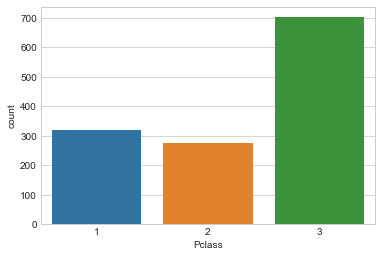

In [77]:
sns.countplot(x = "Pclass", data = train_df)
plt.show()

In [78]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns= ["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,male,22.0,7.2500,NaN,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,female,38.0,71.2833,C85,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,female,26.0,7.9250,NaN,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,female,35.0,53.1000,C123,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,male,35.0,8.0500,NaN,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


## F) Sex

In [79]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0.0,22.0,7.2500,NaN,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,38.0,71.2833,C85,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1.0,26.0,7.9250,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,4,1.0,35.0,53.1000,C123,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0.0,35.0,8.0500,NaN,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1


## G) Drop Passenger ID and Cabin

In [80]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)
train_df.columns

Index(['Survived', 'Age', 'Fare', 'Title_0', 'Title_1', 'Title_2', 'Title_3',
       'family_size_0', 'family_size_1', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'T_A', 'T_A4', 'T_A5', 'T_AQ3', 'T_AQ4', 'T_AS', 'T_C',
       'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_LP', 'T_PC',
       'T_PP', 'T_PPP', 'T_SC', 'T_SCA3', 'T_SCA4', 'T_SCAH', 'T_SCOW',
       'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2',
       'T_SOTONOQ', 'T_SP', 'T_STONO', 'T_STONO2', 'T_STONOQ', 'T_SWPP',
       'T_WC', 'T_WEP', 'T_x', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male'],
      dtype='object')

# 7-Create Models

In [81]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 8-Split Data

Kolaylık olsun diye tüm train ve test verilerini birleştirmiştik. Birleştirdiğimiz index ise **train_df_len** adındaki index ile tutmuştuk. Test verisini bu indeksten sonrasını alarak tekrar ayıracağız.

In [82]:
train_df_len # en yukarıda tanımlamıştık.

881

In [83]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"], axis = 1, inplace = True) # test verisinde target class olmamalı
test.head()

,Age,Fare,Title_0,Title_1,Title_2,Title_3,family_size_0,family_size_1,Embarked_C,Embarked_Q,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
881,34.5,7.8292,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1
882,47.0,7.0000,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
883,62.0,9.6875,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,1
884,27.0,8.6625,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
885,22.0,12.2875,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0


In [84]:
train = train_df[:train_df_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))
print("test: ", len(test))

X_train:  590
X_test:  291
y_train:  590
y_test:  291
test:  418


- x_test ve y_test verisini kırmızı ile belirtilen alandır. En son bu verileri kullanacağız.

<img src="notes\split_data.png">

# 9-Create Simple Logistic Regression Model

In [85]:
logreg = LogisticRegression() # default parameters
logreg.fit(X_train, y_train)

LogisticRegression()

In [86]:
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)

In [87]:
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 83.22
Testing Accuracy: % 81.79


# 10) Hyperparameter Tuning -- Grid Search -- Cross Validation
We will compare 005 ml classifier00 and evaluate mean accuracy of each of them by **stratified cross validation**.

* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression

In [88]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10, 500, 20), # 10'dan 500'e 20'şerli
                "max_depth": range(1, 20, 2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1, 10, 50, 100, 200, 300, 1000]}

rf_param_grid = {"max_features": [1, 3, 10],
                "min_samples_split":[2, 3, 10],
                "min_samples_leaf":[1, 3, 10],
                "bootstrap":[False],
                "n_estimators":[100, 300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7), # -3 ile 3 arasında 7 tane sayı
                    "penalty": ["l1", "l2"]}

# nlinspace=float, int yapılması gerek
knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform", "distance"],
                 "metric":["euclidean", "manhattan"]}

In [89]:
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

# 11) Test Data with All Models

## A) Show Algorithm Results

In [90]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid = classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1, verbose = 1)
    clf.fit(X_train, y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print("{} = {}".format(classifier[i], cv_result[i]))

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
DecisionTreeClassifier(random_state=42) = 0.8355932203389831
Fitting 10 folds for each of 28 candidates, totalling 280 fits
SVC(random_state=42) = 0.7983050847457627
Fitting 10 folds for each of 54 candidates, totalling 540 fits
RandomForestClassifier(random_state=42) = 0.8389830508474576
Fitting 10 folds for each of 14 candidates, totalling 140 fits
LogisticRegression(random_state=42) = 0.8186440677966103
Fitting 10 folds for each of 40 candidates, totalling 400 fits
KNeighborsClassifier() = 0.771186440677966


## B) Visualize Algorithms

Text(0.5, 1.0, 'Cross Validation Scores')

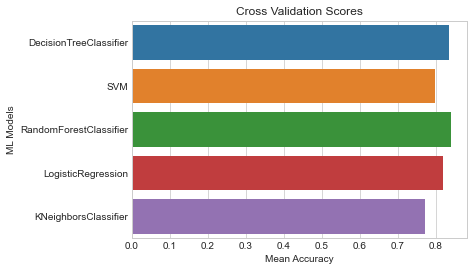

In [91]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

# 12-Ensemble Models (Merge Models)

Yukarıdaki Plotta % 80 thresholdunu aşan modelleri merge edip tekrardan bir accuracy elde etmeye çalışacağız. 

### VotingClassifier ve Soft parametresi nedir?

<img src="notes\voting_classifier.png">

### Note
Aşağıdaki kodun son satırında:
- ```votingC.predict(X_test)``` ilk önce bu işlemle prediction yapılır.
- Daha sonra ```accuracy_score(votingC.predict(X_test), y_test)``` bu sonucu **y_test** ile **accuracy_score** içerisinde karşılaştırıyorum.

In [92]:
# njobs=-1=kod daha hızlı eğitilir.
votingC = VotingClassifier(estimators = [("dt", best_estimators[0]),
                                        ("rfc", best_estimators[2]),
                                        ("lr", best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test), y_test))

0.8144329896907216


# 13-Test(Predict) Data with Original Test Data

In [93]:
#"Survived adında bir seri oluştururuz, yaptığımız tahminleri 0 ve 1 olarak depoluyor."
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived], axis = 1) # passengerId => daha önceden kaydedilmişti
results.to_csv("titanic.csv", index = False) # export predictions

In [94]:
test_survived

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int32